In [1]:
#loading the ext first
%load_ext sql

In [47]:
import csv, sqlite3
import pandas as pd
con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [3]:
%sql sqlite:///socioeconomic.db

In [5]:
# in many cases data to be analyzed is available in CSV format, but to analyze it using SQL we need to first store it in a database
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [27]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [7]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [9]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [14]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data 

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [24]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = ( SELECT max(hardship_index) FROM chicago_socioeconomic_data ) 

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [31]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * sqlite:///socioeconomic.db
Done.


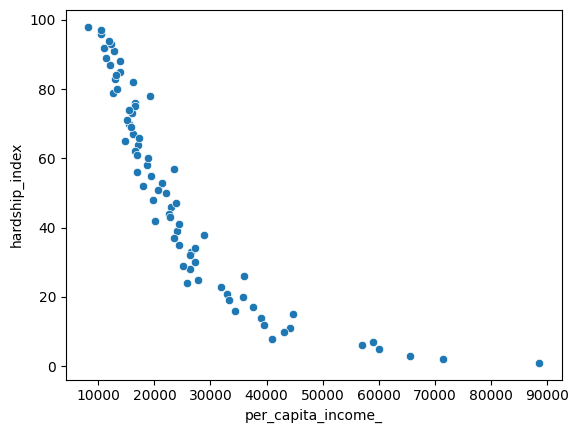

In [55]:
#create a scatterplot using variables per_capita_income and hardship index. What is the correlation between them?
import seaborn as sns
import matplotlib.pyplot as plt
df = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data
df = pd.DataFrame(df, columns=["per_capita_income_", "hardship_index"])
df.head()

plot = sns.scatterplot(x ='per_capita_income_', y = 'hardship_index', data = df)
# we can clearly see that with increase in income the hardship index decreases

In [54]:
# converting sql table to dataframe
dataframe = %sql SELECT * FROM chicago_socioeconomic_data
dataframe.DataFrame()

 * sqlite:///socioeconomic.db
Done.


,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0
